# PfDA Assignment 1 2023

## Problem statement:

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 

## Background

I have chosen to base my synthesised dataset on the passengers on board the RMS Titanic and the relationship between the various factors.  The original dataset has 12 variables but for the puropses of this assignment I am only going to look at a subset of these. 

The variables that I will include are;

- Sex
- Age
- Passenger Class
- Survived
- Siblings/Spouse onboard

# Investigate the types of variables involved, their likely distributions, and their relationships with each other

Having identified a real-world phenomenon to simulate, the next step is to investigate the types of variables involved, their likely distributions, and their relationships with each other. To do so I need data. 

## Types of Variables

<img src = variable_type_infographic.PNG alt = "Data Types Infographic">

A variable is a characteristic that can be measured and that can assume different values. Height, age, income, province or country of birth, grades obtained at school and type of housing are all examples of variables. Understanding the types of variables in a dataset is crucial for performing appropriate analyses and choosing suitable machine learning algorithms for prediction tasks. Different types of variables require different statistical methods and visualization techniques for analysis.  Variables may be classified into two main categories: categorical and numeric. Each category is then classified in two subcategories: nominal or ordinal for categorical variables, discrete or continuous for numeric variables. 

A categorical variable (also called qualitative variable) refers to a characteristic that can’t be quantifiable. Categorical variables can be either nominal or ordinal.

  - A nominal variable is one that describes a name, label or category without natural order. Sex and type of dwelling are examples of nominal variables.

  - An ordinal variable is a variable whose values are defined by an order relation between the different categories.

A numeric or quantative variable is a quantifiable characteristic whose values are numbers.  These variables can be either continous or discrete.

  - A continous variable is one that can assume an infinite number of real values within a given interval.  Continous variables can be further categorised as either interval or ratio variables with one of the key differences being that a ration has a defined zero point.

  - A discrete variable can assume only a finite number of real values within a given interval.

## Loading Original Dataset

In [8]:
# Import modules necessary for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Read in the existing dataset from the online source.

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

df = pd.read_csv(url)

In [ ]:
# Display the dataset information
print(df.info())

In [ ]:
# Print a summary of the numerical variables
print(df.describe())

## Exploring the original dataset

As mentioned above for this project I will only be looking at a subset of the original dataset.  Using the *loc* in pandas I will create a new dataframe *df1* which only contains those variables in which I am interested and will attemp to recreate in a synthesised dataset.

In [ ]:
# Create a new dataframe containing only those variables from the original data that I want to use
df1 = df.loc[:,['Survived','Pclass','Sex','Age','SibSp']]
df1.head()

In [ ]:
# Calculate mean, median, and standard diviation.
relevant_columns = ["Age", "Sex", "Pclass", "Survived"]

mean = df1[relevant_columns].mean()
median = df1[relevant_columns].median()
std_devs = df1[relevant_columns].std()

In [37]:
# Create a summary dataframe.
descriptive_stats = pd.DataFrame({
    "Mean": mean,
    "Median":median,
    "Standard Deviation": std_devs
})

# Display the descriptive statistics.
print(descriptive_stats)

               Mean  Median  Standard Deviation
Age       29.699118    28.0           14.526497
Pclass     2.308642     3.0            0.836071
Survived   0.383838     0.0            0.486592


<Figure size 1000x600 with 0 Axes>

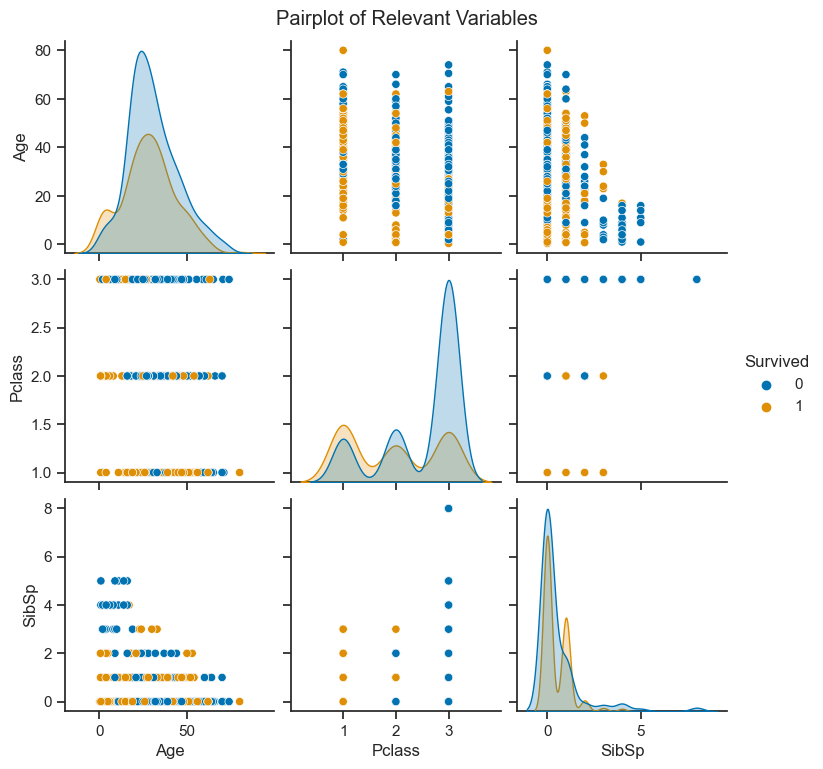

In [31]:
# Pairplot of the subset of original data.
pairplot_columns = ["Age", "Pclass", "Sex", "SibSp", "Survived"]

plt.figure(figsize=(10, 6))
sns.pairplot(df1[pairplot_columns], hue="Survived", dropna=True)
plt.suptitle("Pairplot of Relevant Variables", y = 1.02)
plt.show()

In [ ]:

fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df1[df1['Survived']==1]['Age'], df1[df1['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend();

In [ ]:
fig = plt.figure(figsize =(6, 7))
plt.hist(x = [df1[df1['Survived']==1]['Pclass'], df1[df1['Survived']==0]['Pclass']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Passenger Class Histogram with Survival')
plt.xlabel('Passenger Class')
plt.ylabel('No of passengers')
plt.legend();

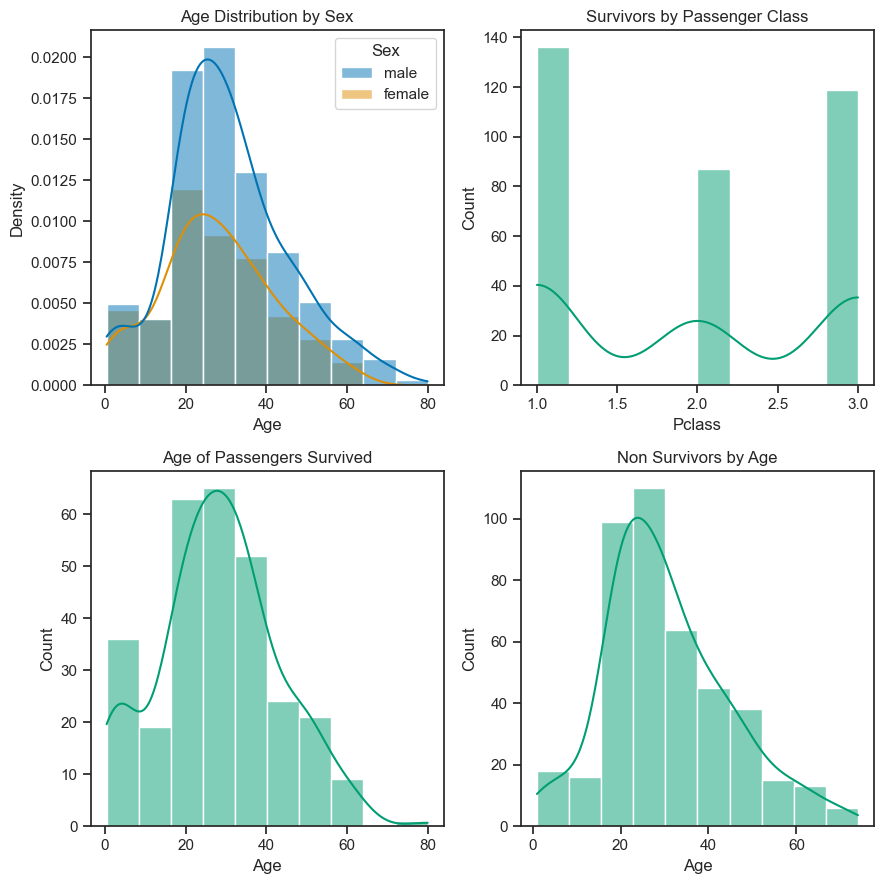

In [16]:
# set up the subplots, style and palette
sns.set(style="ticks", palette="colorblind")
f,axes=plt.subplots(2,2, figsize=(9,9))
# plot the distributions of each of the main variables.
sns.histplot(df1, x='Age', kde=True, stat="density", ax=axes[0,0], bins=10, hue='Sex');
# set axes title
axes[0,0].set_title("Age Distribution by Sex");
sns.histplot(df1[df1['Survived']==1]['Pclass'].dropna(), kde=True, ax=axes[0,1], bins=10, color="g");
axes[0,1].set_title("Survivors by Passenger Class");
sns.histplot(df1[df1['Survived']==1]['Age'].dropna(), kde=True, ax=axes[1,0], bins=10, color="g");
axes[1,0].set_title("Age of Passengers Survived");
sns.histplot(df1[df1['Survived']==0]['Age'].dropna(), kde=True, ax=axes[1,1], bins=10, color="g");
axes[1,1].set_title("Non Survivors by Age");

plt.tight_layout();

In [13]:
# adapted from https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# import the shapiro test from scipy stats
from scipy.stats import shapiro
# calculate the test statistic and the p-value to interpret the test on the Life Ladder sample
stat, p = shapiro(df1['Age'])
# interpret the test
alpha= 0.05
print('stat=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The sample of Age looks Gaussian (fail to reject H0)')
else:
    print('The sample of Age does not look Gaussian (reject H0)')

stat=nan, p=1.000
The sample of Age looks Gaussian (fail to reject H0)


In [15]:
# D'Agostino and Pearson's Test adapted from https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# import from scipy.stats
from scipy.stats import normaltest
# normality test
stat, p = normaltest(df1['Survived'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The sample of Life Ladder looks Gaussian (fail to reject H0)')
else:
    print('The sample of Life Ladder does not look Gaussian (reject H0)')

Statistics=4070.917, p=0.000
The sample of Life Ladder does not look Gaussian (reject H0)


In [ ]:

fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Sex'], df[df['Survived']==0]['Sex']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Sex Histogram with Survival')
plt.xlabel('Sex')
plt.ylabel('No of passengers')
plt.legend();

In [22]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples in the dataset
num_samples = 200


# Generate synthetic features
sex = np.random.choice(['Male', 'Female'], size=200)
age = np.random.poisson(lam=81, size=200).astype(int)
passenger_class = np.random.choice(['1', '2', '3'], size=200)
survived = np.random.choice(['Yes', 'No'], size=200)
port = np.random.choice(['Queenstown', 'Southampton', 'Cherbourg'], size=200)
sibling_spouse = np.random.randint(low=0, high=5, size =200)

# Generate synthetic target variable (response)
# Assuming a linear relationship with noise
# target = 2 * sex + 0.5 * age + np.random.normal(loc=0, scale=0.5, size=100)

# Create a DataFrame to store the synthetic dataset
synthetic_data = pd.DataFrame({
    'Sex': sex,
    'Age': age,
    'Class': passenger_class,
    'Survived': survived,
    'Port of Embarkation' : port,
    'Sibling/Spouse' : sibling_spouse})


# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('synthetic_dataset.csv', index=False)


In [ ]:
# Display the first few rows of the synthetic dataset
print(synthetic_data.head())

In [19]:
# Display the dataset information
print(synthetic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sex                  200 non-null    object
 1   Age                  200 non-null    int32 
 2   Class                200 non-null    object
 3   Survived             200 non-null    object
 4   Port of Embarkation  200 non-null    object
 5   Sibling/Spouse       200 non-null    int32 
dtypes: int32(2), object(4)
memory usage: 7.9+ KB
None


In [ ]:
# Print a summary of the numerical variables
print(synthetic_data.describe())

<function matplotlib.pyplot.show(close=None, block=None)>

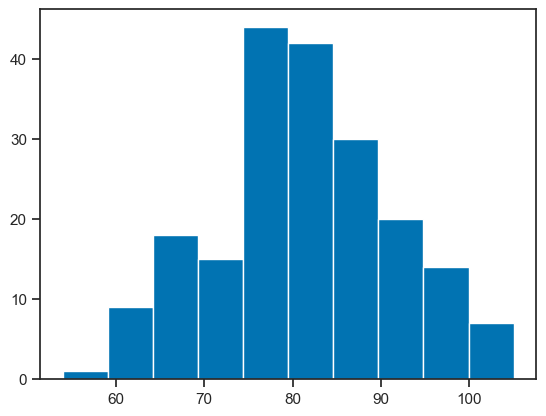

In [24]:
plt.hist(synthetic_data['Age'])
plt.show

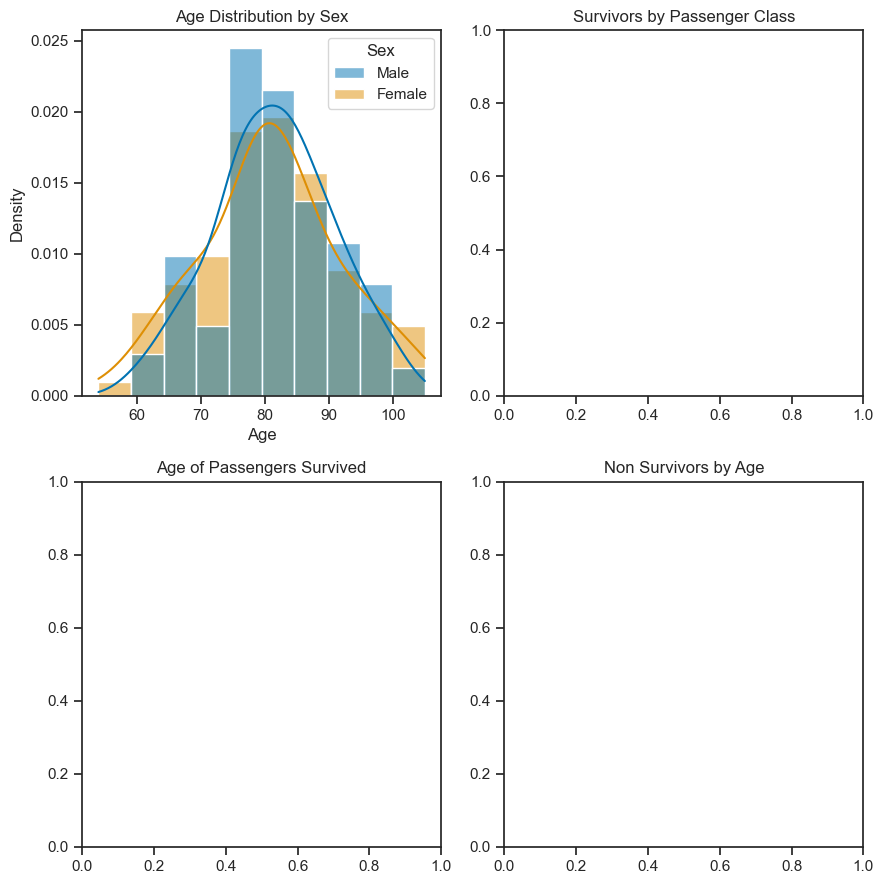

In [32]:
# set up the subplots, style and palette
sns.set(style="ticks", palette="colorblind")
f,axes=plt.subplots(2,2, figsize=(9,9))
# plot the distributions of each of the main variables.
sns.histplot(synthetic_data, x='Age', kde=True, stat="density", ax=axes[0,0], bins=10, hue='Sex');
# set axes title
axes[0,0].set_title("Age Distribution by Sex");
sns.histplot(synthetic_data[synthetic_data['Survived']==1]['Class'].dropna(), kde=True, ax=axes[0,1], bins=10, color="g");
axes[0,1].set_title("Survivors by Passenger Class");
sns.histplot(synthetic_data[synthetic_data['Survived']==1]['Age'].dropna(), kde=True, ax=axes[1,0], bins=10, color="g");
axes[1,0].set_title("Age of Passengers Survived");
sns.histplot(synthetic_data[synthetic_data['Survived']==0]['Age'].dropna(), kde=True, ax=axes[1,1], bins=10, color="g");
axes[1,1].set_title("Non Survivors by Age");

plt.tight_layout();